In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_DIR = '/content/drive/MyDrive/PCOS/PCOS/PCOS'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])




 infected  781
 notinfected  1143


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image




We will split the data such that
70% for training
15 % for vailadation
15 % for testing



In [ ]:
def datafolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split * number_of_images[dir])-5),replace=False):

          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("./"+path,dir)
          shutil.copy(O,D)
          os.remove(O)

  else:
     print("Folder already exist")


In [ ]:
datafolder("train",0.7)

In [ ]:
datafolder("val",0.15)

In [ ]:
datafolder("test",0.15)

In [ ]:
path ='/content/train'
train_data = preprocessingImage1(path)

Found 1336 images belonging to 2 classes.


In [ ]:
path ='/content/test'
test_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [ ]:
path = '/content/val'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.




Model Block




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

In [ ]:
model = Model(base_model.input,x)

In [ ]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=16,
                          callbacks=cb)

<ipython-input-26-0bed7b29e770>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.7625 - accuracy: 0.8594


Epoch 1: val_accuracy improved from -inf to 0.99640, saving model to bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 36s 3s/step - loss: 1.7625 - accuracy: 0.8594 - val_loss: 0.0042 - val_accuracy: 0.9964
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 8.6420e-05 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 8.6420e-05 - accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.4022e-06 - accuracy: 1.0000

10/10 [==============================] - 22s 2s/step - loss: 8.4022e-06 - accuracy: 1.0000
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.1478e-05 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 6.1478e-05 - accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 9.0612e-06 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 9.0612e-06 - accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 5.8677e-05 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 5.8677e-05 - accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 2.7145e-07 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 2.7145e-07 - accuracy: 1.0000
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 7.0539e-06 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 7.0539e-06 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.9469

10/10 [==============================] - 19s 2s/step - loss: 0.6051 - accuracy: 0.9469
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 1.0658e-04 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 1.0658e-04 - accuracy: 1.0000
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 1.3367e-06 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 1.3367e-06 - accuracy: 1.0000
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 7.6226e-06 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 7.6226e-06 - accuracy: 1.0000
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 2.9596e-06 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 2.9596e-06 - accuracy: 1.0000
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 1.4273e-04 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 1.4273e-04 - accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 1.7170e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.7170e-09 - accuracy: 1.0000
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 7.1834e-10 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 7.1834e-10 - accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 1.5704e-07 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 1.5704e-07 - accuracy: 1.0000
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 2.6755e-09 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 2.6755e-09 - accuracy: 1.0000
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 4.7039e-09 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 4.7039e-09 - accuracy: 1.0000
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 6.0154e-10 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 6.0154e-10 - accuracy: 1.0000
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 1.5131e-08 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 1.5131e-08 - accuracy: 1.0000
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 1.8919e-08 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 1.8919e-08 - accuracy: 1.0000
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 2.5070e-07 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 2.5070e-07 - accuracy: 1.0000
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 9.7155e-09 - accuracy: 1.0000

10/10 [==============================] - 28s 3s/step - loss: 9.7155e-09 - accuracy: 1.0000
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 5.7593e-10 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 5.7593e-10 - accuracy: 1.0000
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 7.9341e-08 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 7.9341e-08 - accuracy: 1.0000
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 1.5451e-06 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 1.5451e-06 - accuracy: 1.0000
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 1.3516e-09 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 1.3516e-09 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 1.3357e-09 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 1.3357e-09 - accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 4.5616e-08 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 4.5616e-08 - accuracy: 1.0000


In [ ]:
model = load_model("/content/bestmodel.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"our model accuracy is  {acc * 100} %")

<ipython-input-36-fe794b425aa5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


our model accuracy is  100.0 %


In [ ]:
precision = model.evaluate_generator(test_data)[1]
print(precision)

<ipython-input-37-24fb9cf5c11c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision = model.evaluate_generator(test_data)[1]


1.0


 Our model is perform well on the datasets.


  The model is 100% accurate in detection process.



In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf


def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 1s 1s/step
Affected


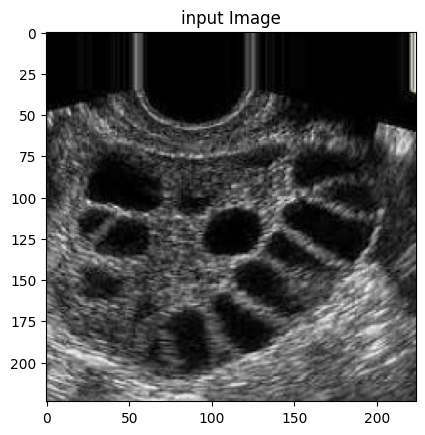

In [ ]:
#It is the infected image sample
predictimage("/content/drive/MyDrive/PCOS/PCOS/PCOS/infected/img_0_3776.jpg")

1/1 [==============================] - 0s 54ms/step
Not Affected


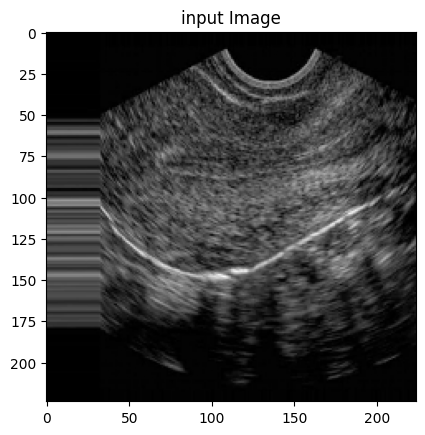

In [ ]:
#It is the not affected sample images
predictimage("/content/drive/MyDrive/PCOS/PCOS/PCOS/notinfected/img_0_3579.jpg")

1/1 [==============================] - 0s 54ms/step
Affected


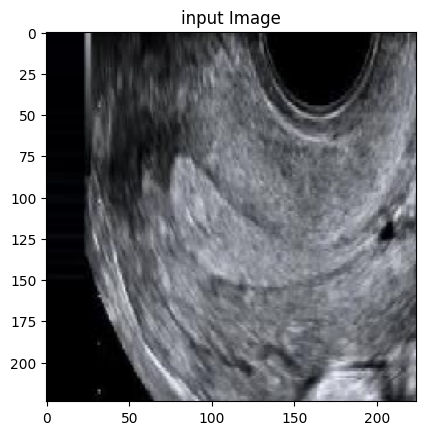

In [ ]:
#not infected image

predictimage("/content/drive/MyDrive/PCOS/PCOS/PCOS/notinfected/img_0_9546.jpg")

1/1 [==============================] - 0s 99ms/step
Affected


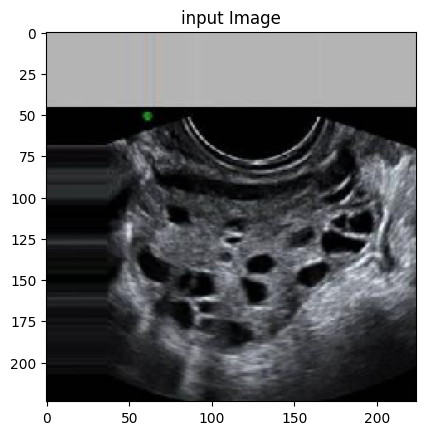

In [ ]:
predictimage("/content/drive/MyDrive/PCOS/PCOS/PCOS/infected/img_0_8837.jpg")